## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.6.0**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to **Ze Xu** at **number1.xuze@berkeley.edu** as a zip-file named
lastname_firstname_1.zip, for example xu_ze_1.zip.

## Problem 1

Show with analytic computation that the region of absolute stability of the 2-stage Milne's method

$$u_{n+1}=u_{n-1}+h\left(\frac{1}{3}f_{n+1}+\frac{4}{3}f_n+\frac{1}{3}f_{n-1}\right).$$

is only along the imaginary axis.

**Solution:**

Verify that 

$$z^2-1-\log z (\frac{1}{3}z^2+\frac{4}{3}z+\frac{1}{3})=-\frac{(z-1)^5}{90}+O((z-1)^6).$$

Use the boundary locus method, and the boundary is

$$
\begin{split}
z&=\frac{e^{2i\theta}-1}{\frac13e^{2i\theta}+\frac43e^{i\theta}+\frac13}\\
&=\frac{3i\sin\theta}{\cos\theta+2}.
\end{split}
$$

So the boundary is along the imaginary axis. Plug in $z=\pm 1$ to show that neither side of the imaginary axis is in the stability region.

Note: if one chooses $z=3$, then the $u_{n+1}$ is eliminated from the equation, and $u_{n+1}$ can choose any value. Therefore $z=3$ does not belong to the RAS.

## Problem 2


Plot  the boundary of the stability region of the BDF4 method 

$$u_{n+4} -\frac{48}{25} u_{n+3} + \frac{36}{25} u_{n+2} - \frac{16}{25} u_{n+1} + \frac{3}{25} u_n = h \frac{12}{25} f_{n+4}.$$

Which side of the region is stable?

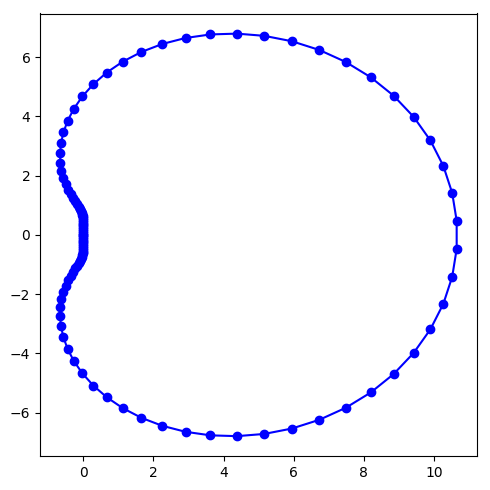

/home/lin/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd63f735d90>

In [1]:
# Boundary locus
N=100
theta=linspace(0,2.0*pi,N)
w = exp.(im*theta)
z = (25*w.^4-48*w.^3+36*w.^2-16*w+3)./(12*w.^4)

using PyPlot
figure(1,figsize=(5,5))
plot(real(z),imag(z),"b-o")

## Problem 3

For the inhomogeneous linear equation.

$$u'(t)=\lambda u(t) + a,\quad a,u(t)\in\mathbb{R}.$$

Consider the Runge-Kutta method with Butcher tableau $A\in\mathbb{R}^{r\times r},b\in\mathbb{R}^{r},Re\lambda<0$

a) Prove that the numerical solution can be written as

$$u_n = R(\lambda h)^n u_0 + \left[\frac{R(\lambda h)^n-1}{R(\lambda h)-1}\right] h b^T(I-zA)^{-1}e a.$$

Here $e=(1,\ldots,1)^T\in\mathbb{R}^{r}$,

$$R(z)=1+zb^T(I-zA)^{-1}e.$$

b) Assume $|R(z)|<1$, prove that 

$$\lim_{n\to\infty} u_n=-\frac{a}{\lambda}.$$

Verify that this limit is indeed the limit of the true solution i.e.

$$\lim_{t\to+\infty} u(t)=-\frac{a}{\lambda}.$$

**Proof:**

$$k=\lambda (u_n e+h A k) + ae.$$

Then

$$u_{n+1}=R(\lambda h) u_n + \Delta t b^T(I-zA)^{-1}e a.$$

Take the limit $n\to \infty$ and use the definition of $R(z)$. Verify the true solution by directly solving the original ODE e.g. using Duhamel's principle.

## Problem 4

Solve the van der Pol equation on the interval $[0,T]$

$$
u''=\frac{1}{\varepsilon}(1-u^2)u'-u.
$$
where $\varepsilon=0.1,u(0)=2,u'(0)=0$,$T=60.0$.

a) Implement a RK4 method named `rk4`. Choose the time step $h = 0.001$. Plot the solution $u(t)$ evaluated from the RK4 method. Save the number $u_{RK4}(T)$ which will be treated as the exact solution later.

b) Implement a 2-step Gauss-Legendre method named `gl2fixpoint`. The Butcher tableau for this method is 

    A = [1.0/4.0                       1.0/4.0 - 1.0/6.0*sqrt(3)
         1.0/4.0 + 1.0/6.0*sqrt(3)     1.0/4.0]
    b = [0.5 0.5]

   Choose $h=0.01$. Use fixed point iteration to solve the nonlinear equation. 
   
   The function `gl2fixpoint` should return the solution, as well as the number of iterations for the fixed point iteration for each time step. Plot a figure with x axis being the discrete time step, and y axis being the number of iterations for each time step. Increase $h = 0.1$ and plot again the number of iterations for each time step to reach the same tolerance. 
   
c) Take $h = T/N$, and $N$ increase from $2^{10}$ to $2^{14}$. Compare the error at the end point $|u_{GL2}(T)-u_{RK4}(T)|$. Demonstrate that the 2-step Gauss-Legendre method is of order 4.   


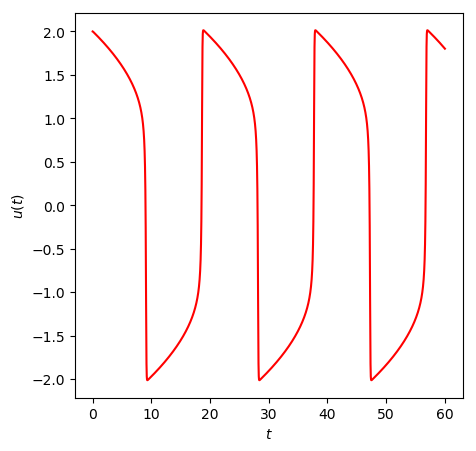

PyObject Text(26,0.5,'$u(t)$')

In [2]:
# RK4
function func(u,eps)
    return [u[2],1.0/eps*((1-u[1]^2)*u[2])-u[1]]
end

function rk4(N,T,u0,eps)
    dt = T/N
    u = zeros(2,N+1)
    t = collect(0:N)*dt
    u[:,1] = u0
    for i = 1 : N
        uc = vec(u[:,i])
        k1 = func(uc,eps)
        k2 = func(uc+0.5*dt*k1,eps)
        k3 = func(uc+0.5*dt*k2,eps)
        k4 = func(uc+dt*k3,eps)
        u[:,i+1] = uc + dt/6.0*(k1+2.0*k2+2.0*k3+k4)
    end
    return u
end

using PyPlot

##############################
T = 60.0
dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
u0 = [2.0,0.0]

# RK4
urk4 = rk4(N,T,u0,eps)

figure(1,figsize=(5,5))
plot(t,vec(urk4[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

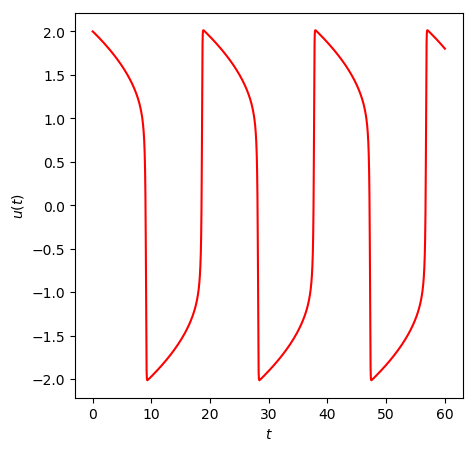

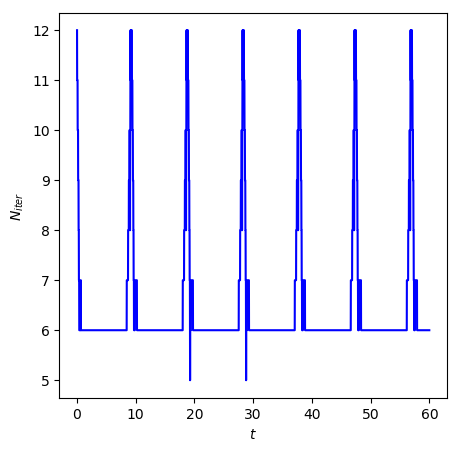

┌ Warning: Use of final value of loop variable `l` around In[3]:33 is deprecated. In the future the variable will be local to the loop instead.
└ @ nothing In[3]:33
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
in gl2fixpoint at In[3]


PyObject Text(26.4,0.5,'$N_{iter}$')

In [3]:
# Gauss-Legendre 2-step. Fixed point formulation

function gl2fixpoint(N,T,u0,eps,maxIter)
    glA = [1.0/4.0   1.0/4.0 - 1.0/6.0*sqrt(3)
    1.0/4.0 + 1.0/6.0*sqrt(3) 1.0/4.0]
    glB = [0.5 0.5]
    dt = T/N
    u = zeros(2,N+1)
    f = zeros(2,N+1)
    Niter = zeros(N)
    
    t = collect(0:N)*dt
    u[:,1] = u0
    tol = 1e-10
    for i = 1 : N
        # Use fixed point iteration to solve the nonlinear equation
        k1 = zeros(2)
        k2 = zeros(2)
        l=1
        res = 0.0
        for l = 1 : maxIter
            uk1 = u[:,i] + dt * (glA[1,1] * k1 + glA[1,2] * k2)
            uk2 = u[:,i] + dt * (glA[2,1] * k1 + glA[2,2] * k2)
            k1New = func(uk1,eps)
            k2New = func(uk2,eps)
            resVec = [k1-k1New;k2-k2New]
            if( norm(resVec) < 1e-10 )
                break
            end
            k1 = k1New
            k2 = k2New
        end
        Niter[i] = l
        u[:,i+1] = u[:,i] + dt * (k1 * glB[1] + k2 * glB[2])
    end
    return u,Niter
end

##############################
T = 60.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step fixed point
ugl2fixpoint,Niter = gl2fixpoint(N,T,u0,eps,500)

figure(1,figsize=(5,5))
plot(t,vec(ugl2fixpoint[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

┌ Warning: Deprecated syntax `2.^`.
│ Use `2 .^` instead.
└ @ nothing none:2
┌ Warning: Deprecated syntax `implicit assignment to global variable `ugl2fixpoint``.
│ Use `global ugl2fixpoint` instead.
└ @ nothing none:0
┌ Warning: Deprecated syntax `implicit assignment to global variable `Niter``.
│ Use `global Niter` instead.
└ @ nothing none:0

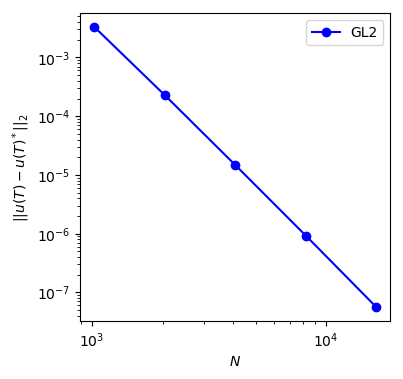

Slope for GL2 = 3.961322678856919


: it has been moved to the standard library package `LinearAlgebra`.
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\kernel.jl:38
Add `using LinearAlgebra` to your imports.
  likely near C:\Users\Jonas\.julia\packages\IJulia\k5o7j\src\

In [4]:
##############################
T = 60.0
eps=0.1
u0 = [2.0,0.0]

NList = 2.^(10:14)
errGL2List   = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    ugl2fixpoint,Niter = gl2fixpoint(N,T,u0,eps,500)
    errGL2List[i] = norm(urk4[1,end]-ugl2fixpoint[1,end])
end
using PyPlot
figure(1,figsize=(4,4))
loglog(NList, errGL2List, "b-o", label="GL2")
axis("tight")
xlabel(L"N")
ylabel(L"$||u(T)-u(T)^*||_2$")
legend()

slopeGL2 = -(log(errGL2List[end])-log(errGL2List[1])) / 
(log(NList[end]) - log(NList[1]))

println("Slope for GL2 = ", slopeGL2 )